In [1]:
import pandas as pd
import json
import sys
import ast

In [2]:
with open('inputs/data.json', 'r') as file:
    raw_data = pd.DataFrame(json.loads(line) for line in file)

raw_data.head(10)

,date,event_type,gender,page_type,productId,products,source,timestamp,uid
0,NaN,pageview,F,cart,NaN,NaN,NaN,2016-01-01 12:56:13,7f5dcd82442966b05f4ebba588c40357752d4a70
1,NaN,pageview,M,cart,NaN,NaN,NaN,2016-01-01 13:41:38,edb9cbe0bc232ae6ec219fefcf57dfbf0adaec8a
2,NaN,pageview,M,checkout,NaN,NaN,NaN,2016-01-01 13:54:50,edb9cbe0bc232ae6ec219fefcf57dfbf0adaec8a
3,NaN,pageview,M,checkout,NaN,NaN,NaN,2016-01-01 13:55:50,edb9cbe0bc232ae6ec219fefcf57dfbf0adaec8a
4,NaN,pageview,M,cart,NaN,NaN,NaN,2016-01-01 14:23:44,b8026364c974ef373aaac058558fbb358cdd2e19
5,NaN,pageview,M,cart,NaN,NaN,NaN,2016-01-01 14:23:53,b8026364c974ef373aaac058558fbb358cdd2e19
6,NaN,pageview,M,cart,NaN,NaN,NaN,2016-01-01 14:24:26,b8026364c974ef373aaac058558fbb358cdd2e19
7,NaN,pageview,M,cart,NaN,NaN,NaN,2016-01-01 14:26:06,b8026364c974ef373aaac058558fbb358cdd2e19
8,NaN,pageview,M,cart,NaN,NaN,NaN,2016-01-01 15:58:13,2d5f26235f2ee67cc8604ed49eafd7aef799931b
9,NaN,pageview,F,cart,NaN,NaN,NaN,2016-01-01 15:58:42,7f5dcd82442966b05f4ebba588c40357752d4a70


In [ ]:
print(raw_data.event_type.unique())
print(raw_data.page_type.unique())
print(len(raw_data.uid.unique()))

In [ ]:
rows = raw_data.loc[raw_data['uid'] == '7f5dcd82442966b05f4ebba588c40357752d4a70']
rows.head(10)

In [ ]:
#this user proves that the value 'checkout' is noise
rows = raw_data.loc[raw_data['uid'] == '6db5f9338f9fc74889816f1494968155e4622eeb']
rows.head(10)

In [ ]:
rows = raw_data.loc[raw_data['uid'] == '6db5f9338f9fc74889816f1494968155e4622eeb']
print(len(rows.index))
print(len(rows.loc[rows.page_type == 'product'].index))

In [ ]:
rows = raw_data.loc[raw_data['uid'] == '0f5bd3d40e69a19454ec8579b9786c0130040c43']
rows.head(10)

In [ ]:
rows = raw_data.loc[raw_data['uid'] == '0f5bd3d40e69a19454ec8579b9786c0130040c43']
print(len(rows.index))
print(len(rows.loc[rows.page_type == 'product'].index))

In [ ]:
print(rows.event_type.unique())
print(rows.page_type.unique())

In [ ]:
print(rows.event_type.unique())
print(rows.page_type.unique())

In [ ]:
raw_data.loc[raw_data['page_type'] == 'cart'].head(10)
#len(raw_data.loc[raw_data['page_type'] == 'cart'])

In [ ]:
print(raw_data.loc[raw_data['page_type'] == 'cart'].products.unique())
print(raw_data.loc[raw_data['page_type'] == 'cart'].productId.unique())

In [ ]:
raw_data.loc[raw_data['page_type'] == 'home'].head(10)

In [ ]:
raw_data.loc[raw_data['page_type'] == 'brand_landing'].head(10)

In [ ]:
raw_data.loc[raw_data['page_type'] == 'confirmation'].head(10)

In [ ]:
print(raw_data.loc[raw_data['page_type'] == 'confirmation'].products.unique())
print(raw_data.loc[raw_data['page_type'] == 'confirmation'].productId.unique())

In [ ]:
raw_data.loc[raw_data['page_type'] == 'search'].head(10)

In [ ]:
print(raw_data.loc[raw_data['page_type'] == 'search'].products.unique())
print(raw_data.loc[raw_data['page_type'] == 'search'].productId.unique())

In [ ]:
raw_data.loc[raw_data['page_type'] == 'other'].head(30)

In [ ]:
print(len(raw_data.loc[raw_data['page_type'] == 'other']))
print(raw_data.loc[raw_data['page_type'] == 'other'].products.unique())
print(raw_data.loc[raw_data['page_type'] == 'other'].productId.unique())

In [ ]:
#All NaN page_type rows are purchase rows

raw_data.page_type.fillna('purchase', inplace=True)
print(len(raw_data.loc[raw_data.page_type == 'purchase']))
print(len(raw_data.loc[raw_data.event_type == 'purchase']))

In [ ]:
print(len(raw_data.loc[raw_data['page_type'] == 'cart']))
print(len(raw_data.loc[raw_data['page_type'] == 'home']))
print(len(raw_data.loc[raw_data['page_type'] == 'brand_landing']))
print(len(raw_data.index))

In [3]:
#Drops rows assumed to be noise views
raw_data.drop(raw_data.loc[raw_data['page_type'] == 'cart'].index, inplace=True, axis=0)
raw_data.drop(raw_data.loc[raw_data['page_type'] == 'home'].index, inplace=True, axis=0) #This column might be useful to determine how much the shopper browses around
raw_data.drop(raw_data.loc[raw_data['page_type'] == 'brand_landing'].index, inplace=True, axis=0) #This column might be useful to determine how much the shopper browses around
raw_data.drop(raw_data.loc[raw_data['page_type'] == 'search'].index, inplace=True, axis=0) #This column might be useful to determine how much the shopper browses around
raw_data.drop(raw_data.loc[raw_data['page_type'] == 'confirmation'].index, inplace=True, axis=0)
raw_data.drop(raw_data.loc[raw_data['page_type'] == 'other'].index, inplace=True, axis=0)
raw_data.drop(raw_data.loc[raw_data['page_type'] == 'checkout'].index, inplace=True, axis=0)
raw_data.drop(raw_data.loc[raw_data['page_type'] == 'category'].index, inplace=True, axis=0) #This column might be useful, have to test score and revisit later
raw_data.drop(raw_data.loc[raw_data['page_type'] == 'subcategory'].index, inplace=True, axis=0) #This column might be useful, have to test score and revisit later
print(raw_data.page_type.unique())
print(len(raw_data.index))

#for now I will ignore the 3 columns that might be useful and see what score I get. Later I might revisit this section

['product' nan]
569580


In [ ]:
#raw_data.loc[raw_data.page_type == 'product'].head(10)

In [ ]:
rows = raw_data.loc[raw_data['uid'] == '0f5bd3d40e69a19454ec8579b9786c0130040c43']
print(len(rows.index))
print(len(rows.loc[rows.page_type == 'product'].index))

In [ ]:
raw_data.loc[raw_data['uid'] == '0f5bd3d40e69a19454ec8579b9786c0130040c43'].head(10)

In [ ]:
def get_user_browsed_products(product_clicks):
    browsed_products = []
    
    for index, product_row in product_clicks.iterrows():
        browsed_products.append(product_row.productId)
    
    return browsed_products

In [ ]:
def get_user_purchased_products(product_clicks):
    purchased_products = []
    
    for index, product_row in product_clicks.iterrows():
        purchased_products.append(product_row.products)
    
    return purchased_products

In [ ]:
processed_dict = {}
count = 0
total_len = len(raw_data.uid.unique())

for user_id in raw_data.uid.unique():
#for user_id in raw_data.uid.loc[raw_data['uid'] == '0f5bd3d40e69a19454ec8579b9786c0130040c43']:
    user_dict = {}
    user_data = raw_data.loc[raw_data['uid'] == user_id]
    user_dict['gender'] = user_data.gender.unique()[0]
    user_dict['products_browsed'] = get_user_browsed_products(user_data.loc[user_data.page_type == 'product'])
    user_dict['products_purchased'] = get_user_purchased_products(user_data.loc[user_data.event_type == 'purchase'])
 
    processed_dict[user_id] = user_dict
    
    count += 1
    sys.stdout.write('\r' + '%0.2f' % ((count / total_len) * 100) + '%')
    sys.stdout.flush()

In [ ]:
processed_data = pd.DataFrame.from_dict(processed_dict, orient='index')
processed_data.head(10)

In [ ]:
processed_data.to_csv('step1_data.csv', sep=';')

In [ ]:
women = processed_data.loc[processed_data.gender == 'F']

num_prods_browsed = 0

for index, woman in women.iterrows():
    num_prods_browsed += len(woman.products_browsed)
    
avg_prods_browsed = num_prods_browsed / len(women.index)

print(num_prods_browsed)
print(avg_prods_browsed)

In [ ]:
men = processed_data.loc[processed_data.gender == 'M']

num_prods_browsed = 0

for index, man in men.iterrows():
    num_prods_browsed += len(man.products_browsed)
    
avg_prods_browsed = num_prods_browsed / len(men.index)

print(num_prods_browsed)
print(avg_prods_browsed)

In [ ]:
catalog = pd.read_csv('processed_catalog.csv', sep=';')
catalog.drop('Unnamed: 0', axis=1, inplace=True)
processed_data = pd.read_csv('step1_data.csv', sep=';')

In [ ]:
catalog.head(2)

In [ ]:
processed_data.head(10)

In [ ]:
def get_spending_habits(purchase_list, catalog_prices):
    avg_spending_list = []
    sale_product_list = []
    full_product_list = []
    avg_spending = 0
    num_items_sale = 0
    likes_sales = False
    
    for product_list in purchase_list:
        spending = 0
        for product in product_list:
            prod_id = product['pid']
            prod_qt = int(product['quantity'])
            catalog_entry = catalog_prices.loc[catalog_prices.pid == prod_id]
            sale_product_list.append(catalog_entry.is_sale.item())
            prod_price = catalog_entry.current_price.item()
            spending += (prod_price * prod_qt)
            full_product_list.append(prod_id)
            
        avg_spending_list.append(spending)
        
    if len(avg_spending_list) == 0:
        return -1,-1,-1
        
    for spent in avg_spending_list:
        avg_spending += spent
        
    for item_sale in sale_product_list:
        if item_sale:
            num_items_sale += 1
        
    avg_spending /= len(avg_spending_list)
    avg_spending += 0.5
    avg_spending = int(avg_spending)
    
    if num_items_sale >= (len(sale_product_list) / 2):
        likes_sales = True
        
    product_frequency_dict = {i:full_product_list.count(i) for i in full_product_list}
    cluster_list = []
    for pid in product_frequency_dict.keys():
        cluster_list.append({'pid':pid,
                             'cluster':catalog_prices.loc[catalog_prices.pid == pid].cluster.item(),
                            'frequency':product_frequency_dict[pid]})
        
    cluster_freq = {}
    for i in range(0,15):
        cluster_freq[i] = 0
        
    for cluster_obj in cluster_list:
        cluster_freq[cluster_obj['cluster']] += 1 + cluster_obj['frequency']
        
    favorite_cluster = -1
    top_num_cluster = 0
    
    for key, freq in cluster_freq.items():
        if freq > top_num_cluster:
            favorite_cluster = key
            top_num_cluster = freq
            
    
    #print(avg_spending_list)
    #print(sale_product_list)
    #print(avg_spending)
    #print(num_items_sale)
    #print(likes_sales)
    #print(product_frequency_dict)
    #print(cluster_list)
    #print(cluster_freq)
    #print(favorite_cluster, top_num_cluster)
    
    return avg_spending, likes_sales, favorite_cluster

In [ ]:
#purchase_list = ast.literal_eval(processed_data.iloc[[45]].products_purchased.item())
#purchase_list = ast.literal_eval(processed_data.iloc[[78]].products_purchased.item())
#purchase_list = ast.literal_eval(processed_data.iloc[[3]].products_purchased.item())#
#print(purchase_list)
#catalog_prices = catalog[['pid', 'current_price', 'is_sale', 'cluster']]
#get_spending_habits(purchase_list, catalog)

In [ ]:
new_list = []
count = 0
total_len = len(processed_data.uid.unique())

for user_id in processed_data.uid.unique():
    catalog_prices = catalog[['pid', 'current_price', 'is_sale', 'cluster']]
    purchase_list = ast.literal_eval(processed_data.loc[processed_data.uid == user_id].products_purchased.item())
    avg_spending, likes_sales, favorite_cluster = get_spending_habits(purchase_list, catalog)
    new_list.append(
        {
            'uid' : user_id,
            'avg_spending' : avg_spending,
            'likes_sales' : likes_sales,
            'favorite_purchase_cluster' : favorite_cluster
        }
    )
    
    count += 1
    sys.stdout.write('\r' + '%0.2f' % ((count / total_len) * 100) + '%')
    sys.stdout.flush()
    
new_df = pd.DataFrame(new_list)
new_df.head(10)

In [ ]:
joined_data = processed_data.join(new_df.set_index('uid'), on='uid')
joined_data.head(10)

In [ ]:
def get_browsing_habits(browse_list, catalog_clusters):
    full_product_list = []
    
    if type(browse_list) == type('str'):
        browse_list = ast.literal_eval(browse_list)
    
    for product in browse_list:
        spending = 0
        full_product_list.append(product)
        
    if len(full_product_list) == 0:
        return -1
    
    product_frequency_dict = {i:full_product_list.count(i) for i in full_product_list}
    cluster_list = []
    for pid in product_frequency_dict.keys():
        try:
            cluster_list.append({'pid':pid,
                                 'cluster':catalog_clusters.loc[catalog_clusters.pid == pid].cluster.item(),
                                 'frequency':product_frequency_dict[pid]})
        except:
            pass
        
    cluster_freq = {}
    for i in range(0,15):
        cluster_freq[i] = 0
        
    for cluster_obj in cluster_list:
        cluster_freq[cluster_obj['cluster']] += 1 + cluster_obj['frequency']
        
    favorite_cluster = -1
    top_num_cluster = 0
    
    for key, freq in cluster_freq.items():
        if freq > top_num_cluster:
            favorite_cluster = key
            top_num_cluster = freq
    
    return favorite_cluster

In [ ]:
#browse_list = ast.literal_eval(processed_data.iloc[[45]].products_browsed.item())
#browse_list = ast.literal_eval(processed_data.iloc[[78]].products_browsed.item())
#browse_list = ast.literal_eval(processed_data.iloc[[3]].products_browsed.item())
browse_list = ast.literal_eval(processed_data.iloc[[13936]].products_browsed.item())
print(type(browse_list))
print(browse_list)
catalog = catalog[['pid', 'cluster']]
print(get_browsing_habits(browse_list, catalog))

In [ ]:
#processed_data.loc[processed_data.uid == '77d899e72f363a685a064ebecdf05fa663d42d4a'].head(1)
processed_data.iloc[[13936]].head(1)

In [ ]:
new_list = []
count = 0
total_len = len(processed_data.uid.unique())

for user_id in processed_data.uid.unique():
    catalog_prices = catalog[['pid', 'cluster']]
    browse_list = ast.literal_eval(processed_data.loc[processed_data.uid == user_id].products_browsed.item())
    favorite_cluster = get_browsing_habits(browse_list, catalog)
    new_list.append(
        {
            'uid' : user_id,
            'favorite_browse_cluster' : favorite_cluster
        }
    )
    
    count += 1
    sys.stdout.write('\r' + '%0.2f' % ((count / total_len) * 100) + '%')
    sys.stdout.flush()
    
new_df = pd.DataFrame(new_list)
new_df.head(10)

In [ ]:
final_data = joined_data.join(new_df.set_index('uid'), on='uid')
final_data.head(10)

In [ ]:
final_data.to_csv('final_data.csv', sep=';')

In [20]:
final_data = pd.read_csv('final_data.csv', sep=';')
final_data.drop('Unnamed: 0', axis=1, inplace=True)
final_data.drop(['products_browsed', 'products_purchased'], axis=1, inplace=True)
final_data.set_index('uid', inplace=True)
final_data['likes_sales'] = final_data['likes_sales'].map({'True': 1, 'False': 0, '-1': -1})
final_data.head(10)

,gender,avg_spending,favorite_purchase_cluster,likes_sales,favorite_browse_cluster
uid,,,,,
000130d3608d9f6cd7a951eb15bca73838a3a263,M,0,2,0,-1
0002c71b578f597fc0e1e63f96fc3cf433ccbc15,F,100,3,1,-1
0002c9b12a68dba967fd9d71068c349d495a15ba,F,527,1,1,1
0004cca63543e635e2c74b04ed2c0ee38952ccb3,M,-1,-1,-1,2
000aa8ec02476d85a2416b5f66ef46a64bf1e319,M,310,2,1,-1
000c678b3a022ab93a8603025dcba4ee23b55b15,F,400,6,0,1
000e569f9291c94e074e37d7a988ca2583a95b1a,F,1800,7,0,-1
000f60244ef70125911814e9660cf42e36bdf349,M,160,0,0,0
00131b313d1b44dba911de02396983eb72f0d530,M,-1,-1,-1,0


In [ ]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.1.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm

X = final_data.drop('gender', axis=1)
Y = final_data['gender']
kf = KFold(n_splits=5, shuffle=True)
#model = XGBClassifier(booster='gbtree', eval_metric="mlogloss")
model = svm.SVC(kernel='linear', C=1)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    model.fit(X_train, Y_train)
    
    results = cross_val_score(model, X, Y, cv=kf)
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

In [ ]:
import xgboost
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1,figsize=(15, 10))
xgboost.plot_importance(model, ax=ax1)
plt.show()

In [ ]:
target_data = pd.read_csv('target_final_data.csv', sep=';')
target_data.set_index('Unnamed: 0', inplace=True)
target_data.head(10)

In [ ]:
y_pred = model.predict(target_data)
final_prediction = pd.DataFrame(y_pred, target_data.index)
final_prediction.reset_index(inplace=True)
final_prediction.columns = ['userId', 'gender']
final_prediction.head(10)

In [ ]:
final_prediction.to_csv('prediction.csv', sep=',', index=False)

In [4]:
def get_aggregated_user_data(raw_data_rows, selected_columns):
    aggregated_data = {}
    for column in selected_columns:
        aggregated_data[column] = []
    
    for column in selected_columns:
        for index, row in raw_data_rows.iterrows():
            aggregated_data[column].append(row[column])                
    
    return aggregated_data

In [5]:
raw_data.date.fillna('unknown', inplace=True)
raw_data.source.fillna('unknown', inplace=True)
print(raw_data.source.unique())
print(raw_data.date.unique())

['unknown' 'desktop' 'mobile']
['unknown' '2017-02-14 19:01:07' '2017-03-27 14:19:00' ...,
 '2016-04-14 11:04:44' '2016-11-14 22:34:28' '2016-11-08 21:08:33']


In [10]:
#raw_data.drop(['event_type', 'gender', 'page_type', 'productId', 'products', 'timestamp'], inplace=True, axis=1)
processed_dict = {}
count = 0
total_len = len(raw_data.uid.unique())

for user_id in raw_data.uid.unique():
    user_dict = {}
    user_data = raw_data.loc[raw_data['uid'] == user_id]
    agg_data = get_aggregated_user_data(user_data, ['date', 'source'])
    user_dict['dates'] = agg_data['date']
    user_dict['sources'] = agg_data['source']
 
    processed_dict[user_id] = user_dict
    
    count += 1
    sys.stdout.write('\r' + '%0.2f' % ((count / total_len) * 100) + '%')
    sys.stdout.flush()

100.00%

In [11]:
processed_data = pd.DataFrame.from_dict(processed_dict, orient='index')
processed_data.head(10)

,dates,sources
000130d3608d9f6cd7a951eb15bca73838a3a263,[2016-05-12 10:46:05],[unknown]
0002c71b578f597fc0e1e63f96fc3cf433ccbc15,[2017-04-06 19:07:36],[desktop]
0002c9b12a68dba967fd9d71068c349d495a15ba,"[unknown, unknown, 2016-06-27 23:03:33, 2016-0...","[desktop, desktop, unknown, unknown, unknown]"
0004cca63543e635e2c74b04ed2c0ee38952ccb3,"[unknown, unknown]","[unknown, unknown]"
000aa8ec02476d85a2416b5f66ef46a64bf1e319,[2016-11-07 22:56:43],[desktop]
000c678b3a022ab93a8603025dcba4ee23b55b15,"[unknown, unknown, unknown, unknown, unknown, ...","[unknown, unknown, unknown, unknown, unknown, ..."
000e569f9291c94e074e37d7a988ca2583a95b1a,[2016-01-28 00:14:59],[unknown]
000f60244ef70125911814e9660cf42e36bdf349,"[unknown, unknown, unknown, unknown, unknown, ...","[desktop, desktop, desktop, desktop, desktop, ..."
00131b313d1b44dba911de02396983eb72f0d530,"[unknown, unknown, unknown, unknown]","[desktop, desktop, desktop, desktop]"
0013eef61cb6f1973913ff2e2441fc3af2aef224,[2016-04-24 20:50:49],[unknown]


In [16]:
additional_info_dict = {}
count = 0
for user_id in processed_data.index.unique():
#for user_id in ['0013eef61cb6f1973913ff2e2441fc3af2aef224']:    
    full_list_dict = {
        'dates':[],
        'sources':[]
    }
    freq = {}

    for date in processed_data.loc[processed_data.index == user_id].dates.item():
        if date is not 'unknown':
            full_list_dict['dates'].append(date)
    
    num_purchases = len(full_list_dict['dates'])

    for source in list(processed_data.loc[processed_data.index == user_id].sources.item()):
        full_list_dict['sources'].append(source)

    freq['sources'] = {i:full_list_dict['sources'].count(i) for i in full_list_dict['sources']}
    freq['sources'].pop('unknown', None)
    
    favorite_source = None

    if freq['sources']: #means dict is not empty
        if len(list(freq.keys())) > 1: #More than one method of access
            if freq['sources']['desktop'] > freq['sources']['mobile']:
                favorite_source = 'desktop'
            elif freq['sources']['desktop'] < freq['sources']['mobile']:
                favorite_source = 'mobile'
            else:
                favorite_source = 'tie'
        else:
            favorite_source = list(freq['sources'].keys())[0]
    else:
        favorite_source =  'unknown'
    
    additional_info_dict[user_id] = {'favorite_source' : favorite_source, 'num_purchases' : num_purchases}
    count += 1
    sys.stdout.write('\r' + '%0.2f' % ((count / total_len) * 100) + '%')
    sys.stdout.flush()

100.00%

In [19]:
additional_df = pd.DataFrame.from_dict(additional_info_dict, orient='index')
additional_df.head(10)

,favorite_source,num_purchases
000130d3608d9f6cd7a951eb15bca73838a3a263,unknown,1
0002c71b578f597fc0e1e63f96fc3cf433ccbc15,desktop,1
0002c9b12a68dba967fd9d71068c349d495a15ba,desktop,3
0004cca63543e635e2c74b04ed2c0ee38952ccb3,unknown,0
000aa8ec02476d85a2416b5f66ef46a64bf1e319,desktop,1
000c678b3a022ab93a8603025dcba4ee23b55b15,desktop,1
000e569f9291c94e074e37d7a988ca2583a95b1a,unknown,1
000f60244ef70125911814e9660cf42e36bdf349,desktop,1
00131b313d1b44dba911de02396983eb72f0d530,desktop,0
0013eef61cb6f1973913ff2e2441fc3af2aef224,unknown,1


In [80]:
#final_data_extra = final_data.join(additional_df)
final_data_extra.head(10)

,gender,avg_spending,favorite_purchase_cluster,likes_sales,favorite_browse_cluster,favorite_source,num_purchases
uid,,,,,,,
000130d3608d9f6cd7a951eb15bca73838a3a263,M,0,2,0,-1,0,1
0002c71b578f597fc0e1e63f96fc3cf433ccbc15,F,100,3,1,-1,1,1
0002c9b12a68dba967fd9d71068c349d495a15ba,F,527,1,1,1,1,3
0004cca63543e635e2c74b04ed2c0ee38952ccb3,M,-1,-1,-1,2,0,0
000aa8ec02476d85a2416b5f66ef46a64bf1e319,M,310,2,1,-1,1,1
000c678b3a022ab93a8603025dcba4ee23b55b15,F,400,6,0,1,1,1
000e569f9291c94e074e37d7a988ca2583a95b1a,F,1800,7,0,-1,0,1
000f60244ef70125911814e9660cf42e36bdf349,M,160,0,0,0,1,1
00131b313d1b44dba911de02396983eb72f0d530,M,-1,-1,-1,0,1,0


In [25]:
print(final_data_extra.favorite_source.unique())
final_data_extra['favorite_source'] = final_data_extra['favorite_source'].map({'unknown': 0, 'desktop': 1, 'mobile': 2})
print(final_data_extra.favorite_source.unique())

['unknown' 'desktop' 'mobile']
[0 1 2]


In [22]:
final_data_extra.to_csv('final_data_extra.csv', sep=';')

In [82]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.1.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
#from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

X = final_data_extra.drop(['gender', 'likes_sales'], axis=1)
Y = final_data_extra['gender'].map({'F':0, 'M':1})
kf = KFold(n_splits=5, shuffle=True)
xgb_model_lv0 = XGBClassifier(booster='gbtree', eval_metric="mlogloss", max_depth=3, learning_rate=0.1, objective='multi:softprob', num_class=2)
#model = svm.SVC(kernel='linear', C=1)
r_forest_lv0 = RandomForestClassifier()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    xgb_model_lv0.fit(X_train, Y_train)
    r_forest_lv0.fit(X_train, Y_train)
    
    results = cross_val_score(xgb_model_lv0, X, Y, cv=kf)
    results_r_forest = cross_val_score(r_forest_lv0, X, Y, cv=kf)
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print("Forest Accuracy: %.2f%% (%.2f%%)" % (results_r_forest.mean()*100, results_r_forest.std()*100))

Accuracy: 80.63% (0.72%)
Forest Accuracy: 77.65% (0.53%)
Accuracy: 80.72% (0.25%)
Forest Accuracy: 77.69% (0.46%)
Accuracy: 80.63% (0.46%)
Forest Accuracy: 77.92% (0.19%)
Accuracy: 80.70% (0.49%)
Forest Accuracy: 77.73% (0.64%)
Accuracy: 80.67% (0.42%)
Forest Accuracy: 77.84% (0.48%)


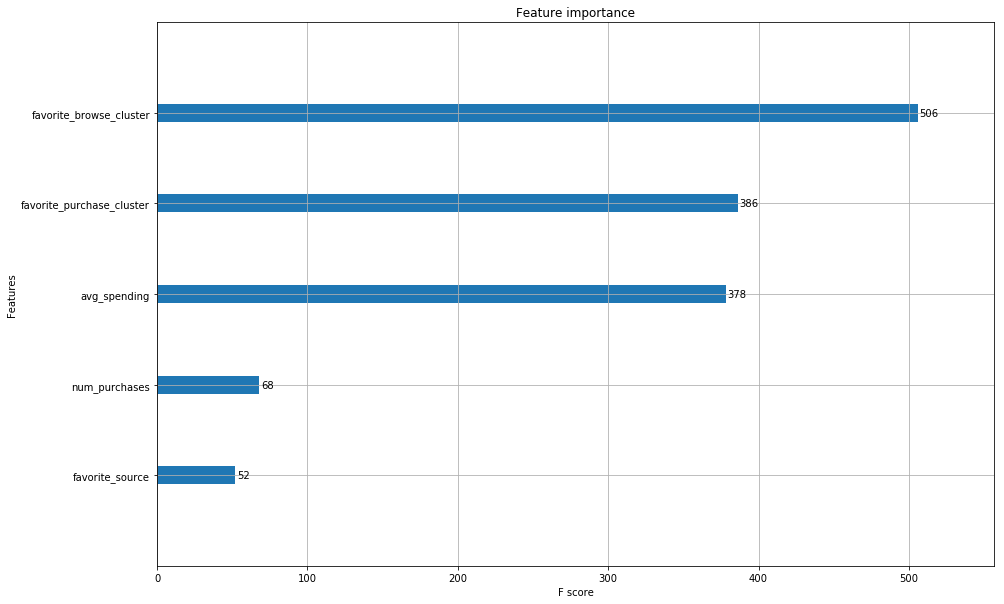

In [87]:
import xgboost
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1,figsize=(15, 10))
xgboost.plot_importance(xgb_model_lv0, ax=ax1)
plt.show()

In [83]:
y_pred = xgb_model_lv0.predict_proba(X)
y_pred_forest = r_forest_lv0.predict_proba(X)
print(y_pred)
print(y_pred_forest)

[[ 0.24298431  0.75701576]
 [ 0.58218414  0.41781586]
 [ 0.86085582  0.13914412]
 ..., 
 [ 0.84116536  0.1588347 ]
 [ 0.14108945  0.8589105 ]
 [ 0.81038898  0.18961097]]
[[ 0.15208352  0.84791648]
 [ 1.          0.        ]
 [ 1.          0.        ]
 ..., 
 [ 0.86102787  0.13897213]
 [ 0.1385103   0.8614897 ]
 [ 0.83238501  0.16761499]]


In [84]:
proba_prediction_xgboost = pd.DataFrame(y_pred, final_data_extra.index).rename(columns={0: "F_prob_xg", 1: "M_prob_xg"})
proba_prediction_forest = pd.DataFrame(y_pred_forest, final_data_extra.index).rename(columns={0: "F_prob_forest", 1: "M_prob_forest"})
proba_prediction = proba_prediction_xgboost.join(proba_prediction_forest)
proba_final_data = final_data_extra.join(proba_prediction)

proba_final_data.head(10)

,gender,avg_spending,favorite_purchase_cluster,likes_sales,favorite_browse_cluster,favorite_source,num_purchases,F_prob_xg,M_prob_xg,F_prob_forest,M_prob_forest
uid,,,,,,,,,,,
000130d3608d9f6cd7a951eb15bca73838a3a263,M,0,2,0,-1,0,1,0.242984,0.757016,0.152084,0.847916
0002c71b578f597fc0e1e63f96fc3cf433ccbc15,F,100,3,1,-1,1,1,0.582184,0.417816,1.000000,0.000000
0002c9b12a68dba967fd9d71068c349d495a15ba,F,527,1,1,1,1,3,0.860856,0.139144,1.000000,0.000000
0004cca63543e635e2c74b04ed2c0ee38952ccb3,M,-1,-1,-1,2,0,0,0.184665,0.815335,0.157879,0.842121
000aa8ec02476d85a2416b5f66ef46a64bf1e319,M,310,2,1,-1,1,1,0.241892,0.758108,0.221505,0.778495
000c678b3a022ab93a8603025dcba4ee23b55b15,F,400,6,0,1,1,1,0.857184,0.142816,1.000000,0.000000
000e569f9291c94e074e37d7a988ca2583a95b1a,F,1800,7,0,-1,0,1,0.710421,0.289579,0.700000,0.300000
000f60244ef70125911814e9660cf42e36bdf349,M,160,0,0,0,1,1,0.124415,0.875585,0.100000,0.900000
00131b313d1b44dba911de02396983eb72f0d530,M,-1,-1,-1,0,1,0,0.141089,0.858911,0.138510,0.861490


In [85]:
X = proba_final_data.drop(['gender', 'likes_sales'], axis=1)
Y = proba_final_data['gender'].map({'F':0, 'M':1})
kf = KFold(n_splits=5, shuffle=True)
xgb_model_lv1 = XGBClassifier(booster='gbtree', eval_metric="mlogloss", max_depth=3, learning_rate=0.1)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    xgb_model_lv1.fit(X_train, Y_train)
    
    results = cross_val_score(xgb_model_lv1, X, Y, cv=kf)
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 84.21% (0.37%)
Accuracy: 84.26% (0.36%)
Accuracy: 84.26% (0.55%)
Accuracy: 84.30% (0.44%)
Accuracy: 84.26% (0.40%)


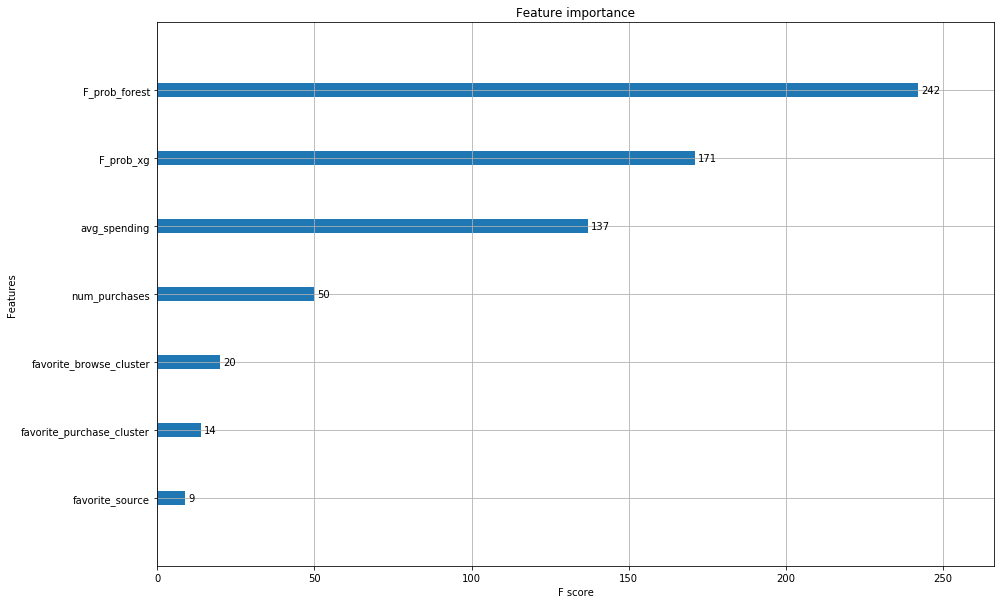

In [88]:
fig, (ax2) = plt.subplots(1,figsize=(15, 10))
xgboost.plot_importance(xgb_model_lv1, ax=ax2)
plt.show()

In [86]:
proba_final_data.to_csv('training_data_probabilities.csv', sep=';')

In [93]:
target_extra = pd.read_csv('target_final_data_extra.csv', sep=';')
target_extra.rename(columns={'Unnamed: 0': "uid"}, inplace=True)
target_extra.set_index('uid', inplace=True)
target_extra.head(10)

,avg_spending,favorite_purchase_cluster,favorite_browse_cluster,favorite_source,num_purchases
uid,,,,,
0002be76b7217f83b3f1da55037ea67fbc640468,265,7,7,1,2
000d64fe9b18dae5c446f79ad572d6119ea3ebe5,490,1,1,1,1
001a2683961fe9194291580ffa50d03307e0d633,350,3,7,2,2
002fc39f7e74103e9eadb53d63b1734ccaa99e3c,699,0,9,1,1
007328275c23d8134b181ec898a38418f6a46d1f,380,0,9,2,1
009b3dad70e2b2a95e8e0f12c3c40bed53c3a152,405,0,9,2,4
00e30f0ed0257423429e2602034ec866fe827ae0,0,2,2,0,1
00fe1b67c5b080c212ebd0f68d06866b1414c633,194,1,1,1,9
012677d15dc18d3aa6b6877fc89431c1b544559e,735,3,3,1,2


In [95]:
y_pred_target = xgb_model_lv0.predict_proba(target_extra)
y_pred_forest_target = r_forest_lv0.predict_proba(target_extra)
print(y_pred_target, y_pred_forest_target)

[[ 0.86294234  0.13705766]
 [ 0.85639483  0.14360516]
 [ 0.78980571  0.21019424]
 ..., 
 [ 0.1420821   0.8579179 ]
 [ 0.108945    0.89105499]
 [ 0.08673251  0.91326743]] [[ 0.9  0.1]
 [ 1.   0. ]
 [ 0.8  0.2]
 ..., 
 [ 0.4  0.6]
 [ 0.   1. ]
 [ 0.4  0.6]]


In [98]:
proba_prediction_xgboost_target = pd.DataFrame(y_pred_target, target_extra.index).rename(columns={0: "F_prob_xg", 1: "M_prob_xg"})
proba_prediction_forest_target = pd.DataFrame(y_pred_forest_target, target_extra.index).rename(columns={0: "F_prob_forest", 1: "M_prob_forest"})
proba_prediction_target = proba_prediction_xgboost_target.join(proba_prediction_forest_target)
proba_final_data_target = target_extra.join(proba_prediction_target)

proba_final_data_target.head(10)

,avg_spending,favorite_purchase_cluster,favorite_browse_cluster,favorite_source,num_purchases,F_prob_xg,M_prob_xg,F_prob_forest,M_prob_forest
uid,,,,,,,,,
0002be76b7217f83b3f1da55037ea67fbc640468,265,7,7,1,2,0.862942,0.137058,0.9,0.1
000d64fe9b18dae5c446f79ad572d6119ea3ebe5,490,1,1,1,1,0.856395,0.143605,1.0,0.0
001a2683961fe9194291580ffa50d03307e0d633,350,3,7,2,2,0.789806,0.210194,0.8,0.2
002fc39f7e74103e9eadb53d63b1734ccaa99e3c,699,0,9,1,1,0.069718,0.930282,0.0,1.0
007328275c23d8134b181ec898a38418f6a46d1f,380,0,9,2,1,0.099234,0.900766,0.0,1.0
009b3dad70e2b2a95e8e0f12c3c40bed53c3a152,405,0,9,2,4,0.118583,0.881417,0.0,1.0
00e30f0ed0257423429e2602034ec866fe827ae0,0,2,2,0,1,0.122528,0.877472,0.0,1.0
00fe1b67c5b080c212ebd0f68d06866b1414c633,194,1,1,1,9,0.864573,0.135427,0.7,0.3
012677d15dc18d3aa6b6877fc89431c1b544559e,735,3,3,1,2,0.660564,0.339436,0.3,0.7


In [106]:
y_pred_extra = xgb_model_lv1.predict(proba_final_data_target)
final_prediction = pd.DataFrame(y_pred_extra, proba_final_data_target.index)
final_prediction.reset_index(inplace=True)
final_prediction.columns = ['userId', 'gender']
final_prediction['gender'] = final_prediction.gender.map({0:'F', 1: 'M'}) #Y = proba_final_data['gender'].map({'F':0, 'M':1})
final_prediction.head(10)

,userId,gender
0,0002be76b7217f83b3f1da55037ea67fbc640468,F
1,000d64fe9b18dae5c446f79ad572d6119ea3ebe5,F
2,001a2683961fe9194291580ffa50d03307e0d633,F
3,002fc39f7e74103e9eadb53d63b1734ccaa99e3c,M
4,007328275c23d8134b181ec898a38418f6a46d1f,M
5,009b3dad70e2b2a95e8e0f12c3c40bed53c3a152,M
6,00e30f0ed0257423429e2602034ec866fe827ae0,M
7,00fe1b67c5b080c212ebd0f68d06866b1414c633,F
8,012677d15dc18d3aa6b6877fc89431c1b544559e,M
9,012cc902e10fc8178e99a4221930ba0332add480,F


In [109]:
final_prediction.to_csv('prediction_3.csv', sep=',', index=False)